# Homework 2: Crypto vs Banks EDA

Author: *Téllez González Jorge Luis*

### **Context**

We are facing both exciting and troubled times in the macroeconomic scene. In the past few days, one of the most important banks in the US, the Silicon Valley Bank, went bankrupt. This event completely shook all the markets around the world and even acted as a catalyst for other banks, such as Signature Bank, to declare bankruptcy as well. 

Cryptocurrencies are being remarked as one of the reasons that made SVB to went bankrupt For example, the International Monetary Fund (IMF) maintains a posture of rejection towards all cryptocurrencies as real assets, often highlighting the potential dangers they could bring to the world economy. But the real question here is, *Are really cryptocurrencies the main reason behind this cataclysm?*

In this work we'll perform an EDA process (Exploratory Data Analysis) using webscraping to retrieve data of the stocks of SIVB and their performance before and after of the bankruptcy in order to gain initial insights about this event and its impact on global markets.

**Objective:** Perform an Exploratory Data Analysis and get insights about the SVP bankruptcy and the impact it caused in the international markets. 

**Data source:** Yahoo Finance.  

We'll recover the next data of SVP:

* 'High' and 'Low': max and low prices of the stock in one day. 
* 'Open' y 'Close': initial stock price in the beginning of one day and close stock price after the ending of the day.
* 'Volume': amount of money that has been traded for the stock in a single day.

### **Library import**

We will be using Yahoo Finance, mplfinance, and TradingView. Please ensure that you have these libraries installed and set up in your environment if you want to run this Jupyter notebook on your local system.

In [222]:
!pip install yfinance
!pip install tradingview_ta 
!pip install mplfinance

In [223]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import time
import datetime as dt
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno
import seaborn as sns             # Para la visualización de datos basado en matplotlib
import yfinance as yf
import mplfinance as mpl
from tradingview_ta import TA_Handler, Interval, Exchange

### **Webscraping**

We will retrieve the data about the SVP stocks using Yahoo Finance and storing them in a pandas dataset as follows:

In [224]:
begin_recover='2012-01-02'
ending_recover='2023-03-19' 

#Activo a recuperar.
nombre_activo='SIVB'
svp = yf.download(nombre_activo, begin_recover, ending_recover)
svp

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,48.970001,50.349998,48.720001,48.840000,48.840000,276629
2012-01-04,48.340000,49.709999,47.540001,49.250000,49.250000,258498
2012-01-05,49.720001,52.360001,49.310001,51.590000,51.590000,653749
2012-01-06,51.700001,52.480000,50.599998,51.610001,51.610001,461424
2012-01-09,51.610001,53.389999,51.150002,53.369999,53.369999,508159
...,...,...,...,...,...,...
2023-03-13,106.040001,106.040001,106.040001,106.040001,106.040001,0
2023-03-14,106.040001,106.040001,106.040001,106.040001,106.040001,0
2023-03-15,106.040001,106.040001,106.040001,106.040001,106.040001,0


### **Step 1: Data structure description**

1) First, we are going to describe the dimension of the dataset.

In [225]:
svp.shape #Row, column.

(2820, 6)

2. We will check the datatypes in our dataset. As we can see, we have only int and float (numerical) datatypes. 

In [226]:
svp.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### **Step 2: Identification of missing data**

1) We will verify if our dataset has any null value in any variable or column. As expected, this dataset has no missing data; fact that often won't apply in datasets of another nature.

In [227]:
svp.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [228]:
svp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2012-01-03 to 2023-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2820 non-null   float64
 1   High       2820 non-null   float64
 2   Low        2820 non-null   float64
 3   Close      2820 non-null   float64
 4   Adj Close  2820 non-null   float64
 5   Volume     2820 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 154.2 KB


### **Step 3: Anomalous Data Detection**

We will use graphs in order to get an initial understanding of the distribution of the data. 

1. Firstly, we'll describe the data using histograms, which group data for each variable and display how many values fall within a particular range. 

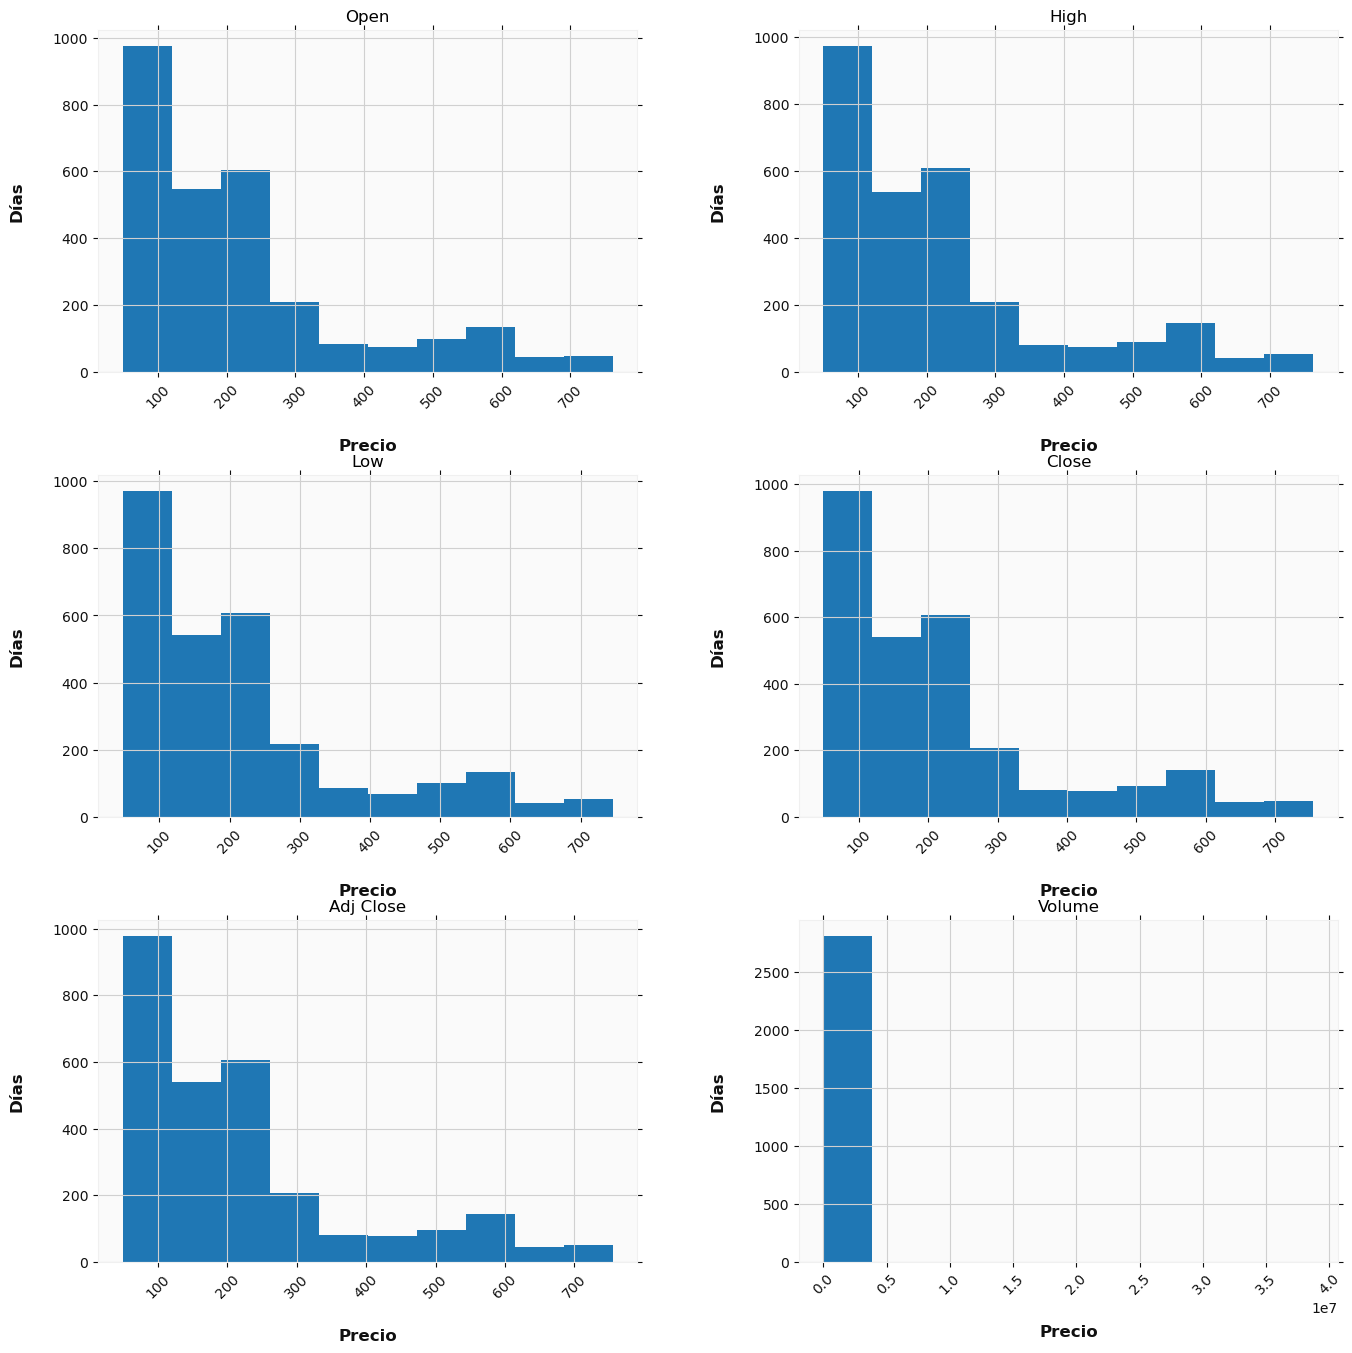

In [229]:
ax = svp.hist(figsize=(16,16), xrot=45)

for x in ax.flatten(): #For each histogram.

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Set x-axis label
    x.set_xlabel("Precio", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Días", labelpad=20, weight='bold', size=12)


**First insights:**

* It is observed that the distribution of stock prices tends to be located on the left side, between 100 and 300 dollars per share. This pattern is observed in open, close, high, and low.
* Volume has biased balues on the left side. Also we can see some anomalous data given the range displayed on the histogram (up to 4e7). 

2. Secondly, we will get an statistical resume of the numerical variables as follows:

In [230]:
svp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2.820000e+03
mean,222.577371,226.102409,218.847369,222.516831,222.516831,4.962108e+05
std,161.907413,164.629636,158.785200,161.699024,161.699024,8.172472e+05
min,48.340000,49.709999,47.540001,48.840000,48.840000,0.000000e+00
25%,106.227503,107.512497,105.017498,106.305002,106.305002,2.942355e+05
50%,179.925003,182.224998,177.315002,179.815002,179.815002,4.048000e+05
75%,258.907509,262.691246,254.802502,258.707489,258.707489,5.597515e+05
max,761.479980,763.219971,745.465027,755.030029,755.030029,3.874648e+07


**First insights:**

* We can identify the steep fall in the price of SVP stocks in the minimum row, in contrast to the highest recorded value of the stock in the max row.
* Besides of that, all data seems to be correct.

3. Now we will use plotboxes in order to detect any outliers.

c:\Users\jorje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


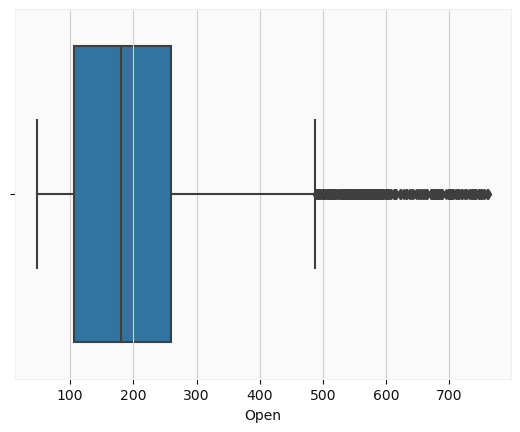

c:\Users\jorje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


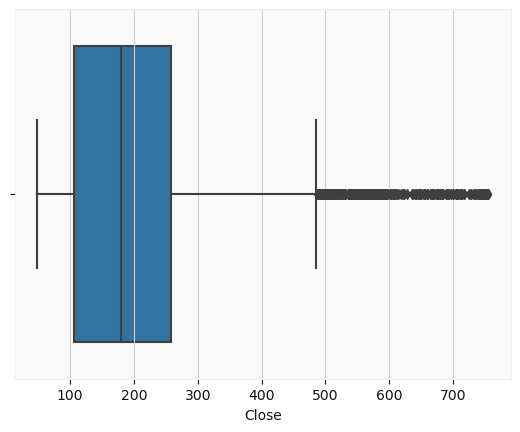

c:\Users\jorje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


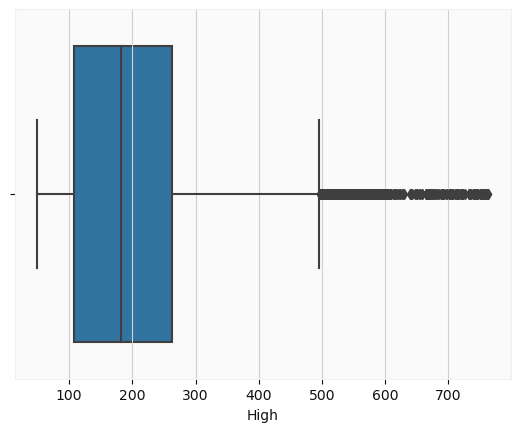

c:\Users\jorje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


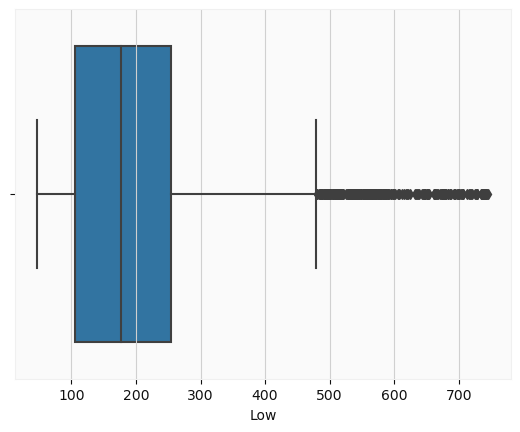

c:\Users\jorje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


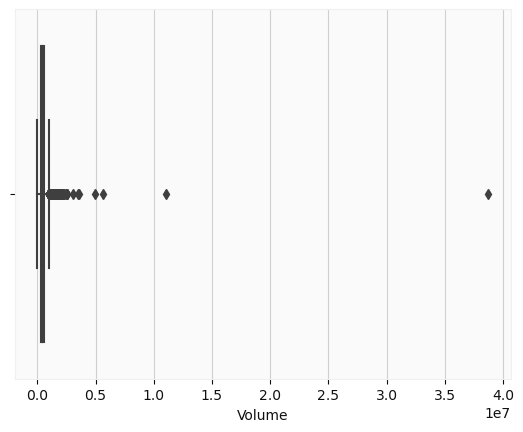

In [231]:
VariablesValoresAtipicos = ['Open', 'Close', 'High', 'Low', 'Volume']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data = svp)
  plt.show()

**First insights:**

* It is observed that Volume has plenty of "outliers" (one of them has a value around 4e7, which is located too far in comparison to the other values). It could be assumed that this particular day was when SVP stocks had a lot of movements (possibly related to the bankruptcy event?).


* In the other variables we can see also plenty of values located after the $500 mark, but they are not considered to be outliers as they may represent a bull market on the SVP stocks. We will look at this matter in next steps.

We will identify the outlier to see in which date the volume was strangely high:

In [ ]:
svp = svp.loc[(svp['Volume']) >= 1000000]

Because we don't have categorical variables, we will jump to the next step.

### **Step 4: Identification of relationships between variable pairs**

We will use a correlational matrix and heatmap to describe the relationships between the variables of our dataset.

In [232]:
svp.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999697,0.999564,0.999202,0.999202,0.014147
High,0.999697,1.000000,0.999532,0.999587,0.999587,0.016197
Low,0.999564,0.999532,1.000000,0.999695,0.999695,0.003714
Close,0.999202,0.999587,0.999695,1.000000,1.000000,0.006261
Adj Close,0.999202,0.999587,0.999695,1.000000,1.000000,0.006261
Volume,0.014147,0.016197,0.003714,0.006261,0.006261,1.000000


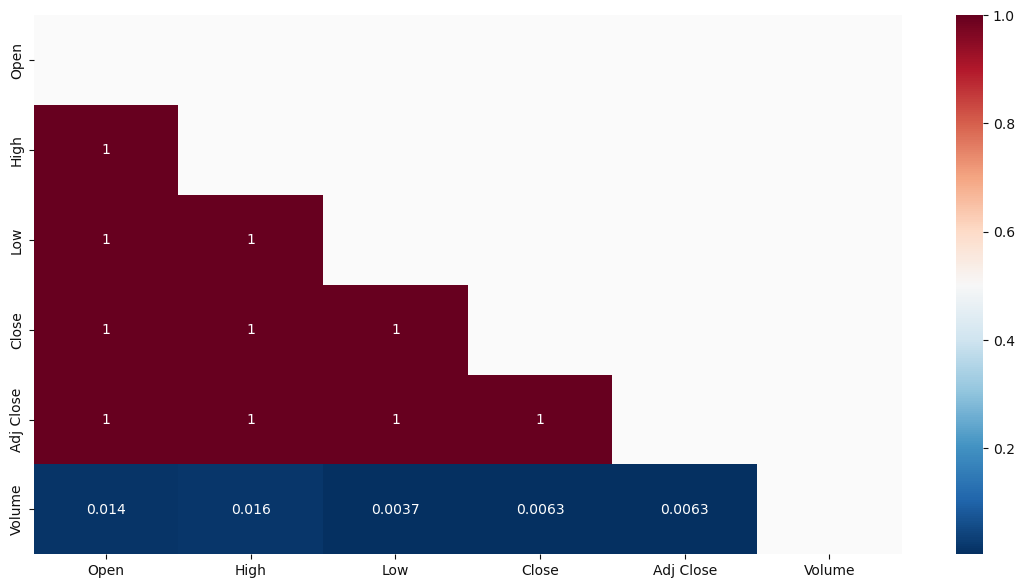

In [233]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(svp.corr())
sns.heatmap(svp.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**First insights:**

* The relationship between Open, High, Low, Close and Adj Close is equal to 1, so all of them represent a strong correlation.
* Volume doesn't seem to have a strong relationship with any of the other variables of the stock price, as we can see in the values close to 0 in the heatmap.

### **Step 5: Financial Plots and correlations between Cryptocurrencies**

We have seen throughout this work an exploratory analysis on the data of interest. Now, we will use mplfinance to obtain financial charts of SVP in order to subsequently compare them with other benchmark stock index and with the main cryptocurrencies in the sector: Bitcoin, Ethereum and BNB.

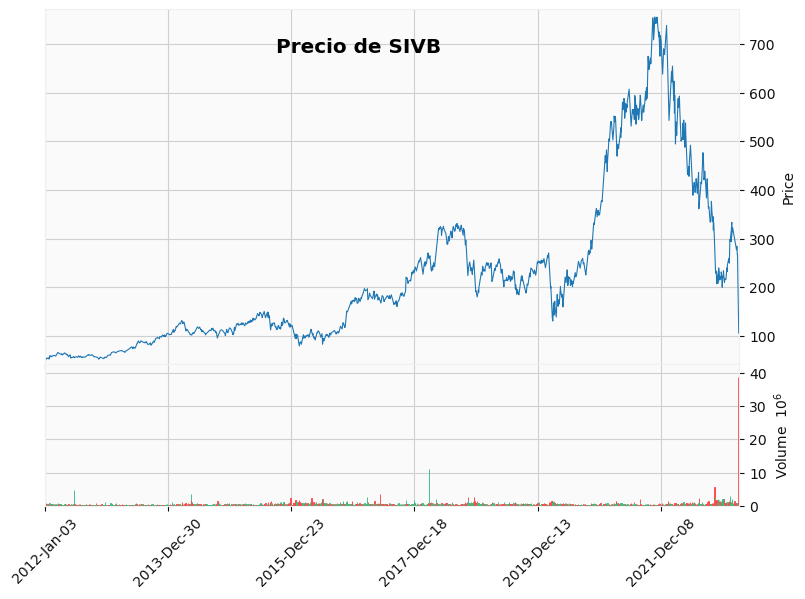

In [234]:
mpl.plot(svp, type='line', volume = True, tight_layout = True, title = 'Precio de {}'.format(nombre_activo), style = 'yahoo')

We will retrieve now the Nasdaq 100 and BTC-USD for comparison.

In [235]:
# NASDAQ 100
nombre_activo='NDX'
ndx = yf.download(nombre_activo, begin_recover, ending_recover)

# BTC
nombre_activo='BTC-USD'
btc = yf.download(nombre_activo, begin_recover, ending_recover)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Now we will integrate our datasets on a single graph dropping all the variables except Adj Close, which is the closing price after adjustments for all applicable splits and dividend distributions.

In [236]:
svp = svp.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
svp.rename(columns = {'Adj Close': 'SIVB'}, inplace = True)

ndx = ndx.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
ndx.rename(columns = {'Adj Close': 'NASDAQ 100'}, inplace = True)

btc = btc.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
btc.rename(columns = {'Adj Close': 'BTC-USD'}, inplace = True)

In [237]:
stocks = pd.concat([svp, ndx, btc], 
                      axis = 'columns', join = 'inner')
stocks.tail

<bound method NDFrame.tail of                   SIVB    NASDAQ 100       BTC-USD
Date                                              
2014-09-17  114.540001   4073.570068    457.334015
2014-09-18  116.339996   4103.080078    424.440002
2014-09-19  114.949997   4100.089844    394.795990
2014-09-22  112.260002   4061.229980    402.152008
2014-09-23  112.730003   4051.570068    435.790985
...                ...           ...           ...
2023-03-13  106.040001  11923.169922  24197.533203
2023-03-14  106.040001  12199.790039  24746.074219
2023-03-15  106.040001  12251.320312  24375.960938
2023-03-16  106.040001  12581.389648  25052.789062
2023-03-17  106.040001  12519.879883  27423.929688

[2140 rows x 3 columns]>

In [238]:
# In case of null values.
stocks = stocks.dropna()
stocks

,SIVB,NASDAQ 100,BTC-USD
Date,,,
2014-09-17,114.540001,4073.570068,457.334015
2014-09-18,116.339996,4103.080078,424.440002
2014-09-19,114.949997,4100.089844,394.795990
2014-09-22,112.260002,4061.229980,402.152008
2014-09-23,112.730003,4051.570068,435.790985
...,...,...,...
2023-03-13,106.040001,11923.169922,24197.533203
2023-03-14,106.040001,12199.790039,24746.074219
2023-03-15,106.040001,12251.320312,24375.960938


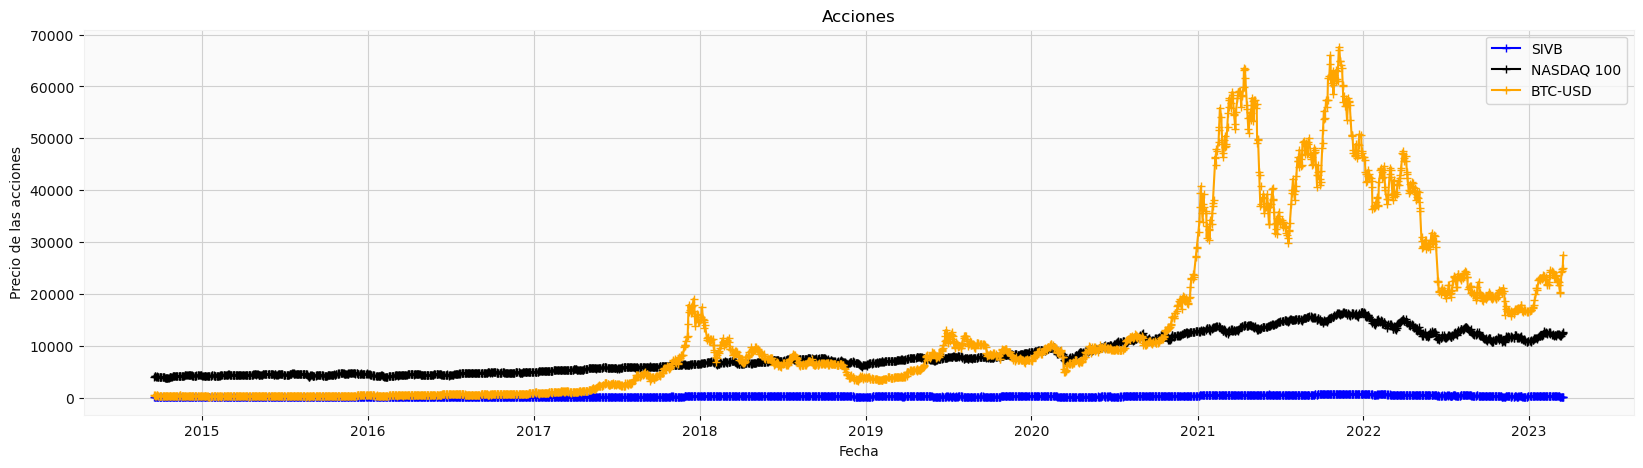

In [239]:
plt.figure(figsize = (20, 5))
plt.plot(stocks['SIVB'], color='blue', marker='+', label='SIVB')
plt.plot(stocks['NASDAQ 100'], color='black', marker='+', label='NASDAQ 100')
plt.plot(stocks['BTC-USD'], color='orange', marker='+', label='BTC-USD')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones')
plt.grid(True)
plt.legend()
plt.show()

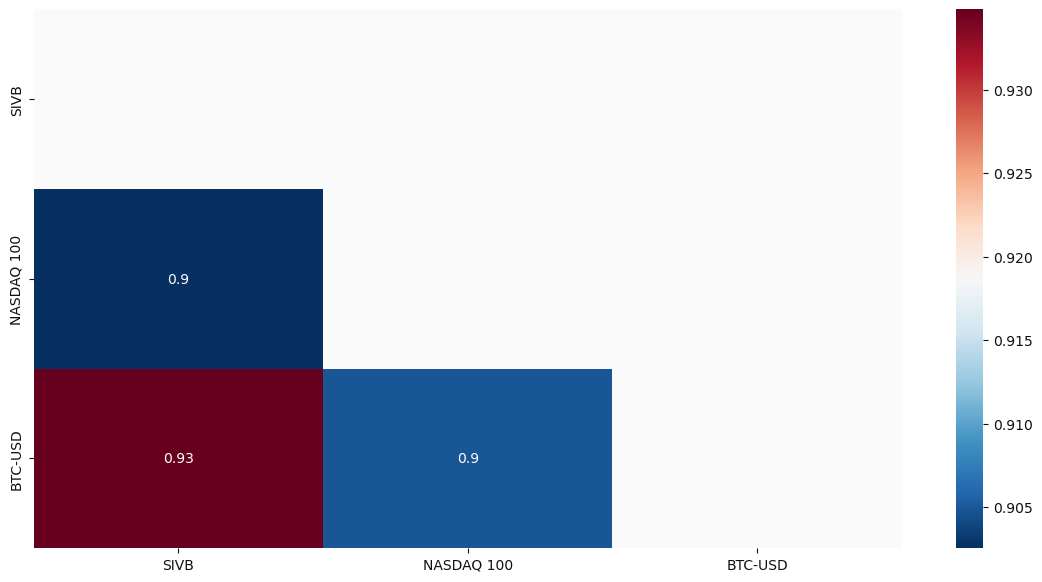

In [240]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(stocks.corr())
sns.heatmap(stocks.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [241]:
stocks.corr()

,SIVB,NASDAQ 100,BTC-USD
SIVB,1.000000,0.902526,0.934823
NASDAQ 100,0.902526,1.000000,0.904916
BTC-USD,0.934823,0.904916,1.000000


In [242]:
stocks.columns

Index(['SIVB', 'NASDAQ 100', 'BTC-USD'], dtype='object')

Now, we'll look more closely to this year.

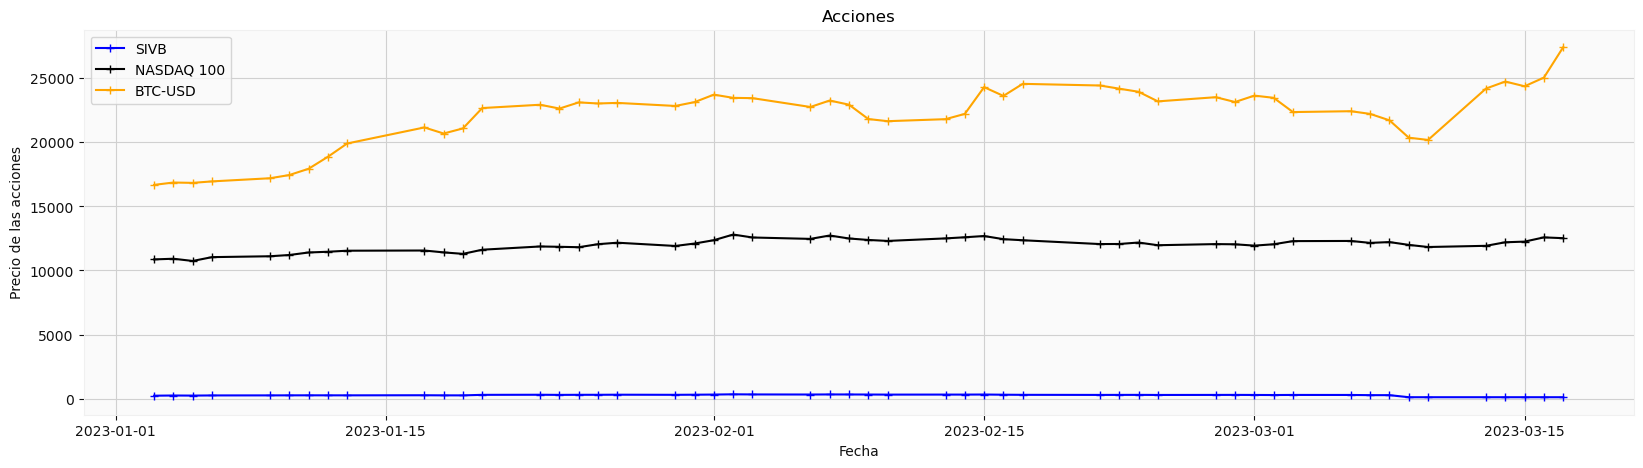

In [243]:
stocks.index = pd.to_datetime(stocks.index, unit='s')
stocks_acotado = stocks.loc[(stocks.index >= '2023-01-01')]

#stocks = stocks.loc[(stocks['D'] >= fecha_inicio) & (df_original['fecha'] <= fecha_fin)]
plt.figure(figsize = (20, 5))
plt.plot(stocks_acotado['SIVB'], color='blue', marker='+', label='SIVB')
plt.plot(stocks_acotado['NASDAQ 100'], color='black', marker='+', label='NASDAQ 100')
plt.plot(stocks_acotado['BTC-USD'], color='orange', marker='+', label='BTC-USD')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones')
plt.grid(True)
plt.legend()
plt.show()

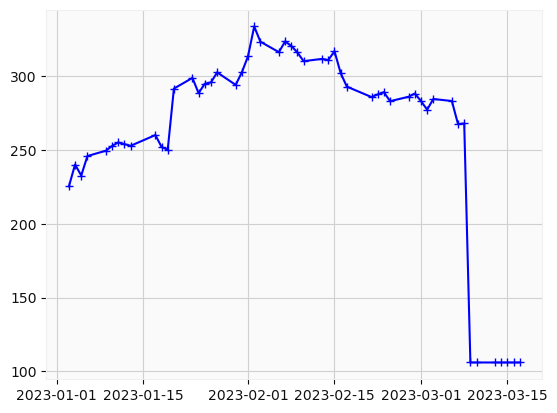

In [244]:
# Now let's look at the sad part of the story...
plt.plot(stocks_acotado['SIVB'], color='blue', marker='+', label='SIVB')

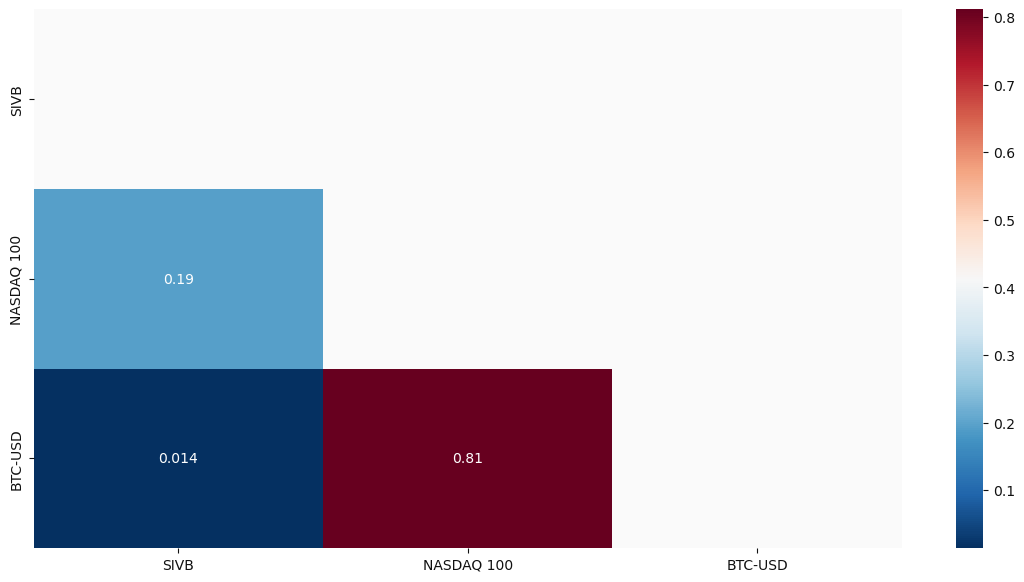

In [245]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(stocks_acotado.corr())
sns.heatmap(stocks_acotado.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

We can observe that over the last year, there has been almost no relationship between BTC-USD and SIVB. Additionally, we can see that BTC-USD has experienced an upward trend during the last month of March. Although there is a small correlation between BTC-USD and NASDAQ 100, we can see that there is a strong correlation between BTC-USD and NASDAQ 100, indicating that we might expect similar trends between the two at first glance; but this may not always be true. 

Currently, BTC has been outperforming the traditional markets which have been shaken by the SVP Bankruptcy. Thanks to the quick measures taken by the US government, the impact caused by SVP has been contained, but the markets are still nervous that we may be facing the greatest financial crisis since the Lehman Brothers collapse in 2008.